In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [9]:
'''def preprocess_data(df):
    # Fill missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)  # Drop less useful columns

    # Convert categorical variables
    df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

    # Feature Engineering
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df.drop(columns=['SibSp', 'Parch'], inplace=True)

    return df'''

def preprocess_data(df):
    #Checking if column names are in the dataset
    expected_columns = ['Age', 'Embarked', 'Cabin', 'Ticket', 'Name', 'Sex', 'SibSp', 'Parch']
    missing_columns = [col for col in expected_columns if col not in df.columns]

    if missing_columns:
        print(f"Warning: Missing columns {missing_columns}, skipping related operations.")

    #Handling missing values safely
    if 'Age' in df.columns:
        df['Age'] = df['Age'].fillna(df['Age'].median())

    if 'Embarked' in df.columns:
        df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    #Dropping less useful columns if they exist
    drop_cols = ['Cabin', 'Ticket', 'Name']
    df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

    #Converting categorical variables safely
    if 'Sex' in df.columns:
        df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

    if 'Embarked' in df.columns:
        df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

    #Feature Engineering - Generating New column 'FamilySize'
    if 'SibSp' in df.columns and 'Parch' in df.columns:
        df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
        df = df.drop(columns=['SibSp', 'Parch'])

    return df

In [10]:
#Preprocessing the dataset
df = preprocess_data(df)

In [11]:
#Define features and target
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

In [12]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

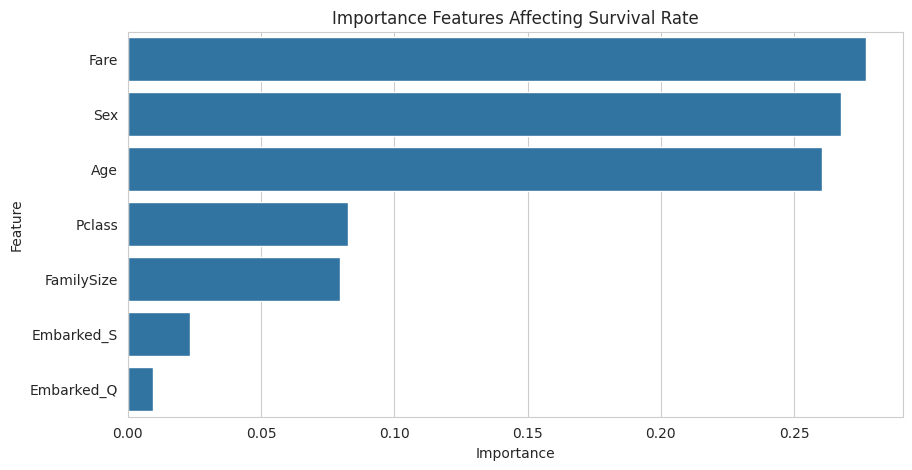

In [46]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importance Features Affecting Survival Rate')
plt.show()

In [18]:
#Feature 'Survived' is treated as a categorical variable
df['Survived'] = df['Survived'].map({0: "Did Not Survive", 1: "Survived"})

#Setting plot style
sns.set_style("whitegrid")

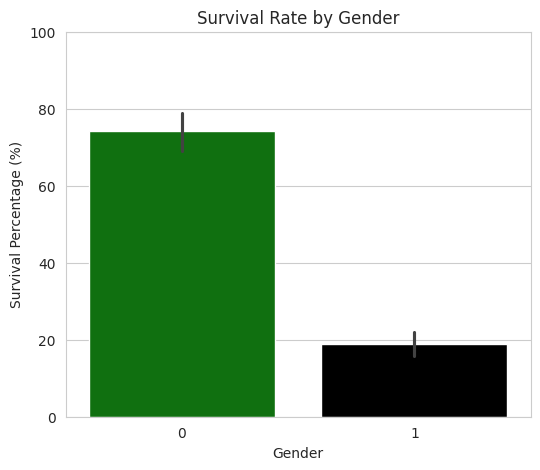

In [42]:
#Survival Rate by Gender
plt.figure(figsize=(6,5))
sns.barplot(x=df['Sex'], y=df["Survived"].map({"Did Not Survive": 0, "Survived": 1}) * 100,hue=df["Sex"], palette=["green", "black"],legend=False) #,
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Percentage (%)")
plt.ylim(0, 100)  # Ensures the y-axis is in percentage form
plt.show()

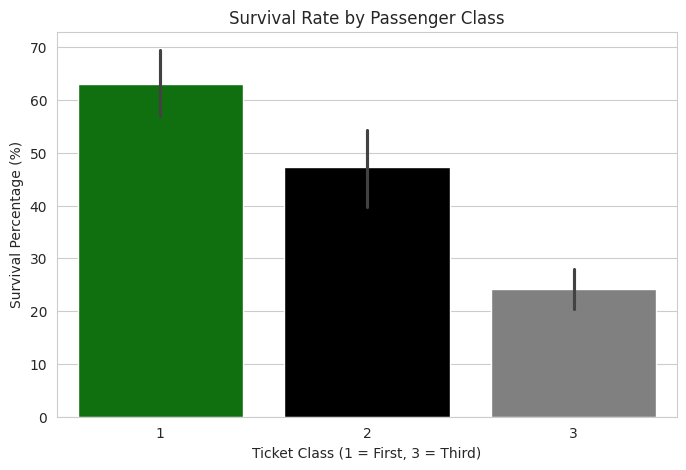

In [43]:
#Survival Rate by Passenger Class
plt.figure(figsize=(8,5))
sns.barplot(x=df['Pclass'], y=df['Survived'].map({"Did Not Survive": 0, "Survived": 1}) * 100, legend=False, hue=df["Pclass"], order=[1,2,3], palette=["green", "black","grey"])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Ticket Class (1 = First, 3 = Third)")
plt.ylabel("Survival Percentage (%)")
plt.show()

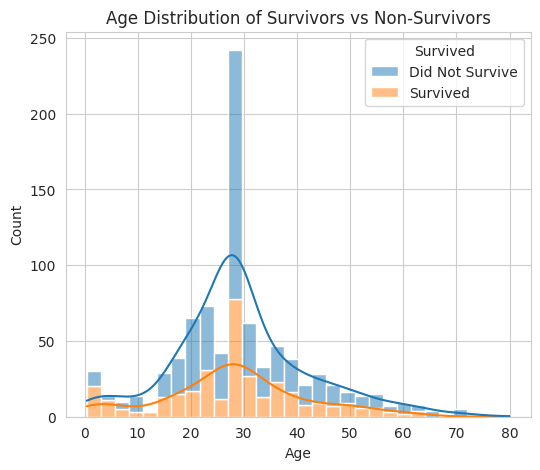

In [29]:
#Survival Distribution by Age
plt.figure(figsize=(6,5))
sns.histplot(df, x="Age", hue="Survived",legend=False, bins=30, kde=True, multiple="stack")
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

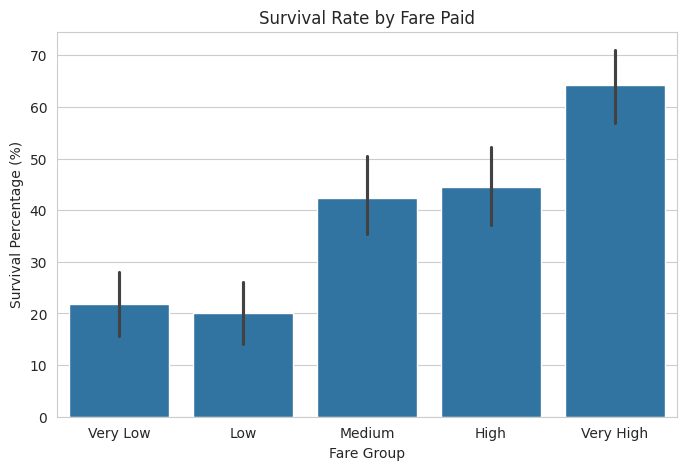

In [31]:
#Survival Rate by Fare (Grouped)
df['FareGroup'] = pd.qcut(df['Fare'], 5, labels=["Very Low","Low", "Medium", "High", "Very High"])
plt.figure(figsize=(8,5))
sns.barplot(x=df['FareGroup'], y=df['Survived'].map({"Did Not Survive": 0, "Survived": 1}) * 100)
plt.title("Survival Rate by Fare Paid")
plt.xlabel("Fare Group")
plt.ylabel("Survival Percentage (%)")
plt.show()

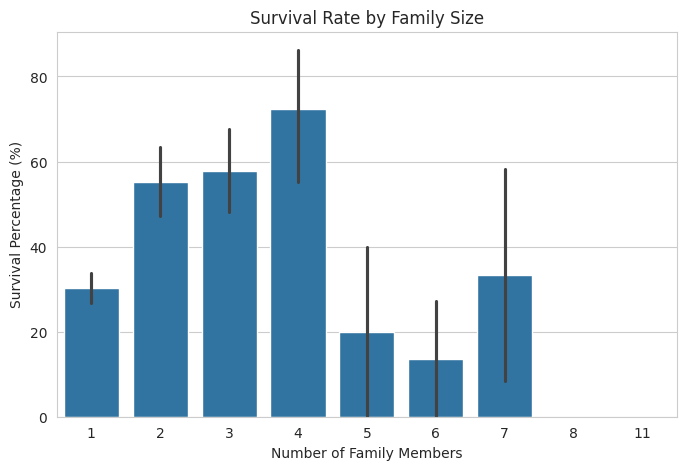

In [36]:
#Survival Rate by Family Size

#df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Include self
plt.figure(figsize=(8,5))
sns.barplot(x=df['FamilySize'], y=df['Survived'].map({"Did Not Survive": 0, "Survived": 1}) * 100)
plt.title("Survival Rate by Family Size")
plt.xlabel("Number of Family Members")
plt.ylabel("Survival Percentage (%)")
plt.show()

Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



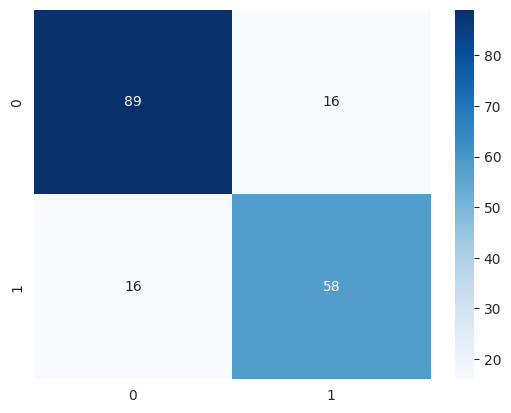

In [45]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

# Conclusion of Titanic Survival Analysis
Our analysis of the Titanic dataset reveals clear patterns in survival chances based on multiple factors:
1.	**Gender**: Women had a significantly higher survival rate than men, supporting the "Women and Children First" policy.
2.	**Passenger** Class: First-class passengers had the highest survival rate, while third-class passengers had the lowest, indicating that wealth and access to resources played a crucial role.
3.	**Age**: Younger passengers, particularly children, had a higher survival rate compared to older individuals.
4.	**Fare Paid**: Passengers who paid higher fares had a better chance of survival, reinforcing the class-based survival advantage.
5.	**Family Size:** Those traveling with small families had a higher survival probability compared to those traveling alone, suggesting that having family support improved survival chances.

***Key Takeaway:***
Survival on the Titanic was largely influenced by social status, gender, and accessibility to lifeboats rather than just randomness. Women, children, and first-class passengers had the highest survival rates, highlighting the inequalities in emergency situations.
